#**Random Forest Assignment - 2**



About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


**Data** = Company_Data.csv

## **Importing Necessary Libraries**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## **Importing Data**

In [ ]:
dataset = pd.read_csv('Company_Data.csv')
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## **Initial Analysis**

In [ ]:
dataset.shape

(400, 11)

In [ ]:
dataset.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
dataset.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
dataset.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## **Data Preparation**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

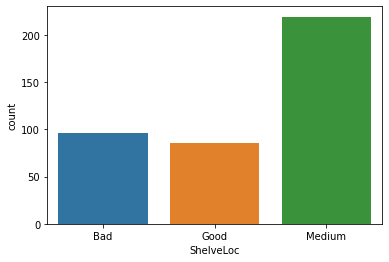

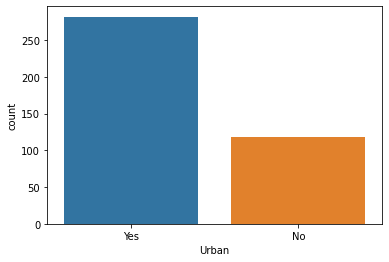

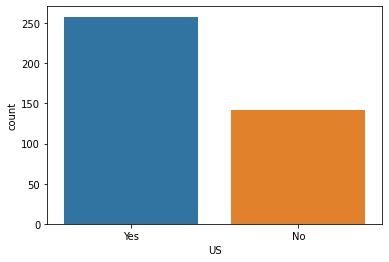

In [ ]:
sns.countplot(dataset['ShelveLoc'])
plt.show()

sns.countplot(dataset['Urban'])
plt.show()

sns.countplot(dataset['US'])
plt.show()

####**Converting  attributes into categories**

In [ ]:
dataset['Sales'] = pd.cut(x=dataset['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
dataset['CompPrice'] = pd.cut(x=dataset['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

dataset['Income'] = pd.cut(x=dataset['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

dataset['Advertising'] = pd.cut(x=dataset['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

dataset['Population'] = pd.cut(x=dataset['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

dataset['Price'] = pd.cut(x=dataset['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

dataset['Age'] = pd.cut(x=dataset['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

dataset['Education'] = pd.cut(x=dataset['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [ ]:
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes
398,Low,Medium,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes


#### **Encoding categorical data**

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

dataset['Sales'] = label_encoder.fit_transform(dataset['Sales'])
dataset['CompPrice'] = label_encoder.fit_transform(dataset['CompPrice'])
dataset['Income'] = label_encoder.fit_transform(dataset['Income'])
dataset['Advertising'] = label_encoder.fit_transform(dataset['Advertising'])
dataset['Population'] = label_encoder.fit_transform(dataset['Population'])
dataset['Price'] = label_encoder.fit_transform(dataset['Price'])
dataset['ShelveLoc'] = label_encoder.fit_transform(dataset['ShelveLoc'])
dataset['Age'] = label_encoder.fit_transform(dataset['Age'])
dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
dataset['Urban'] = label_encoder.fit_transform(dataset['Urban'])
dataset['US'] = label_encoder.fit_transform(dataset['US'])

In [ ]:
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


## **Model Building**

In [ ]:
x =dataset.drop(labels='Sales', axis=1)
y =dataset[['Sales']]

In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [ ]:
y

,Sales
0,2
1,2
2,2
3,2
4,1
...,...
395,0
396,2
397,2
398,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12,stratify=y)

In [ ]:
x_train.shape, x_test.shape

((320, 10), (80, 10))

In [ ]:
y_train.shape,y_test.shape

((320, 1), (80, 1))

## **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model  = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=6)
RF_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6)

In [ ]:
from sklearn.model_selection import GridSearchCV
Grid_search_cv = GridSearchCV(estimator = RF_model, param_grid = {'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']},cv=5)
Grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]})

In [ ]:
Grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [ ]:
Grid_search_cv.best_score_

0.671875

In [ ]:
from sklearn.model_selection import cross_val_score,KFold #Explore Kfold
cv_scores = cross_val_score(estimator = RF_model, X = x, y=y,cv=5)
print('5 Fold CV scores   : ',cv_scores)
print('Mean Accuracy      : ',round(cv_scores.mean(),4))
print('STD Deviation      : ',round(cv_scores.std(),4))


5 Fold CV scores   :  [0.6875 0.675  0.75   0.6875 0.6875]
Mean Accuracy      :  0.6975
STD Deviation      :  0.0267


## **Model Testing**

In [ ]:
y_train_pred = RF_model.predict(x_train)
y_train_pred

array([2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
y_test_pred = RF_model.predict(x_test)
y_test_pred

array([2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2])

## **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

Training data

In [ ]:
accuracy_score(y_train,y_train_pred)

0.8

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[  1,   0,  21],
       [  0,  68,  36],
       [  0,   7, 187]])

Test data

In [ ]:
accuracy_score(y_test,y_test_pred)

0.7375

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[ 0,  0,  5],
       [ 0, 14, 12],
       [ 0,  4, 45]])

##**Model Deployement**

In [ ]:
from pickle import dump

In [ ]:
dump(RF_model,open('RF_model_pkl','wb'))

In [ ]:
from pickle import load 

In [ ]:
RF_model_pickle = load(open('RF_model_pkl','rb'))

In [ ]:
pickle_pred = RF_model_pickle.predict(x_test)